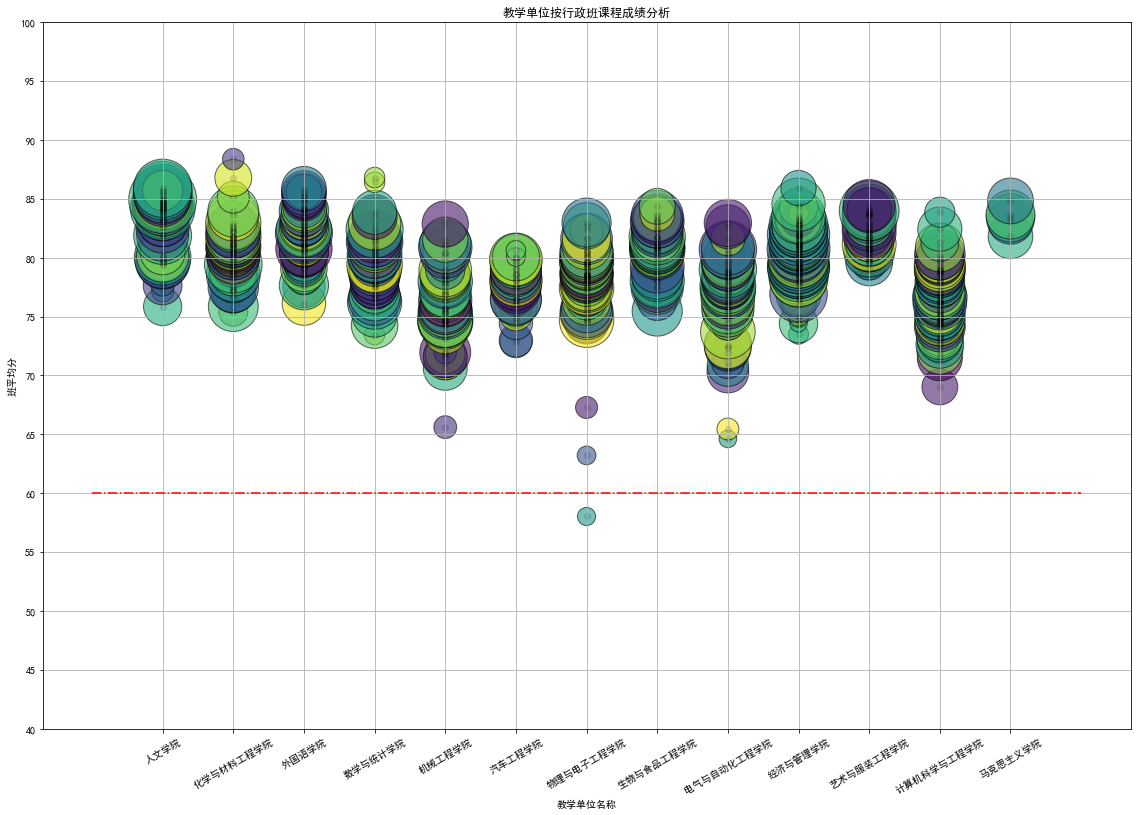

In [64]:
#各学院整体成绩分析
#按行政班

import molychin.database as mldb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
#import os

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

cursor=mldb.moly_condb()    #连接数据库，使用默认用户名
SQL="select jgmc,bj,avg(bfzcj) avg1,count(*) cnt from zftal_jwlg.gjfx_xscjb \
where njmc>=2010 group by jgmc,bj having count(*)>300 order by jgmc,avg1"

cursor.execute(SQL)
result_set=cursor.fetchall()

jgmc_list,bj_list,avg_list,cnt_list=[],[],[],[]
for record in result_set:
    jgmc=record[0]
    bj=record[1]
    avg=record[2]
    cnt=record[3]
    
    jgmc_list.append(jgmc)
    bj_list.append(bj)
    avg_list.append(avg)
    cnt_list.append(cnt)

jgmc_enum=list(set(jgmc_list))  
#print(jgmc_enum)
colors_list=np.random.rand(len(jgmc_list))
#colors_list=np.random.rand(len(jgmc_list))*avg_list
#colors_list=np.random.rand(len(jgmc_list))*100+avg_list
#colors_list= cm.rainbow(np.linspace(0, 1, len(avg_list)))

#print (len(jgmc_list))
#print (colors_list)

len1=len(jgmc_enum)
plt.figure(figsize=[1.5*len1,13])
#plt.scatter(jgmc_list,avg_list,s=cnt_list)
#plt.scatter(jgmc_list,avg_list,s=cnt_list,c=colors_list)
#plt.scatter(jgmc_list,avg_list,s=cnt_list,alpha=0.6,c=colors_list)
#plt.scatter(jgmc_list,avg_list,s=cnt_list,alpha=0.8,c=colors_list)
plt.scatter(jgmc_list,avg_list,s=cnt_list,alpha=0.6,c=colors_list,edgecolors='k')
#plt.scatter(jgmc_list,avg_list,s=cnt_list,alpha=0.6,c=colors_list,edgecolors='k',marker='D')
plt.scatter(jgmc_list,avg_list,c='k',alpha=0.1)
plt.plot([-1,len1],[60,60],'r-.')

plt.grid()
plt.xticks(rotation=30)
plt.yticks(range(40,101,5))
plt.title("教学单位按行政班课程成绩分析")
plt.xlabel('教学单位名称')
plt.ylabel('班平均分')

pic_file_name="../img/教学单位按行政班课程成绩分析11.png"
#print (pic_file_name)
plt.savefig(pic_file_name)
plt.show()
